# California Water Conservation Data Cleaning 
---

[Public Water System Operations Monthly Water Production and Conservation Information](https://data.ca.gov/dataset/drinking-water-public-water-system-operations-monthly-water-production-and-conservation-information)

[Data Dictionary](https://data.ca.gov/dataset/drinking-water-public-water-system-operations-monthly-water-production-and-conservation-information/resource/a3aa420d-3553-4891-8bc4-ed01aeaf3e20)

[Stream Gage Sites](https://data.cnra.ca.gov/dataset/gspgsmd)

[California Electrical Energy Generation](https://www.energy.ca.gov/data-reports/energy-almanac/california-electricity-data/california-electrical-energy-generation)

[Well Perforations](https://data.cnra.ca.gov/dataset/periodic-groundwater-level-measurements/resource/f1deaa6d-2cb5-4052-a73f-08a69f26b750)

[Periodic Groundwater Level Measurements](https://data.cnra.ca.gov/dataset/periodic-groundwater-level-measurements)

[Ground Surface Displacement](https://data.cnra.ca.gov/dataset/wdl-ground-surface-displacement)

[Water Conservation Supplier Compliance](https://www.kaggle.com/calepa/water-conservation-supplier-compliance?select=supplier_compliance.csv)

#### Imports

In [277]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

sns.set(style="ticks", context="talk")
plt.style.use("fivethirtyeight")

In [278]:
# df = pd.read_csv('./datasets/9_GFW_potential_carbon_sequestration/young_forest_sequestration_rate_Griscom_extent.tif')
conserv = pd.read_csv('./datasets/conservation_compliance/supplier_compliance.csv')
july = pd.read_csv('./datasets/conservation_compliance/july_2016_nonfilers.csv')
august = pd.read_csv('./datasets/conservation_compliance/august_2016_nonfilers.csv')
groundwater = pd.read_csv('./datasets/groundwater_measurements.csv')
water = pd.read_csv('./datasets/water_capacity.csv')
subsidence = pd.read_csv('./datasets/continuousgroundsurfacedisplacementdaily.csv')
point_displacement =  pd.read_csv('./datasets/continuousgroundsurfacedisplacementpoint.csv')
emergency = pd.read_csv('./datasets/uw_emergency_response061521.csv')

---
## CA Water Conservation Compliance Data
---

In [279]:
conserv.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,28%,28%,No,13.1%,18.0%,13.1%,14.9%,C,16.8%,20.5%,148.5,"14,120"
1,Yucaipa Valley Water District,South Coast,34%,20%,Yes,18.3%,7.1%,7.1%,12.9%,NaN,26.4%,11.9%,260.0,"45,018"
2,Sanger City of,Tulare Lake,26%,26%,No,17.3%,12.4%,17.3%,8.7%,NaN,38.0%,17.2%,181.1,"25,664"
3,Adelanto City of,South Lahontan,16%,16%,No,9.3%,-10.3%,9.3%,6.7%,C,20.5%,-30.6%,125.5,"29,023"
4,Red Bluff City of,Sacramento River,33%,33%,No,27.8%,19.5%,27.8%,5.2%,NaN,42.4%,30.8%,202.9,"14,076"


In [280]:
conserv.columns

Index(['Supplier Name', ' Hydrologic Region',
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Did Supplier Self-certify?',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By', ' Order Status',
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ' Estimated Aug 2016 Monthly R-GPCD', ' Total Population Served'],
      dtype='object')

In [281]:
print("conserv shape", conserv.shape)
print("jul shape", july.shape)
print("aug shape", august.shape)

conserv shape (389, 14)
jul shape (4, 2)
aug shape (20, 2)


So the July and August csvs seem mostly useless for now

---
## CA Water Suppliers Data
---

In [282]:
print("water shape", water.shape)
water.head()

water shape (32425, 25)


,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,water_shortage_contingency_stage_invoked,water_shortage_level_indicator,...,reported_preliminary_commercial_agricultural_water,reported_final_commercial_agricultural_water,reported_preliminary_commercial_industrial_and_institutional_water,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,qualification
0,East Bay Municipal Utilities District,CA0110005,2021-04-15,"Alameda,Contra Costa",San Francisco Bay,3,1400000.0,1379000.0,Stage 0,No,...,NaN,NaN,1026.0,NaN,4.964000e+09,5.418000e+09,0.0,0.0,73.2781,1. To provide contextâ€¦the average R-GPCD for...
1,East Bay Municipal Utilities District,CA0110005,2021-03-15,"Alameda,Contra Costa",San Francisco Bay,3,1400000.0,1379000.0,Stage 0,No,...,NaN,NaN,908.0,NaN,4.221000e+09,4.928000e+09,0.0,0.0,59.3274,1. To provide contextâ€¦the average R-GPCD for...
2,East Bay Municipal Utilities District,CA0110005,2021-02-15,"Alameda,Contra Costa",San Francisco Bay,3,1400000.0,1379000.0,Stage 0,No,...,NaN,NaN,801.0,NaN,3.549000e+09,4.016000e+09,0.0,0.0,55.2268,1. To provide contextâ€¦the average R-GPCD for...
3,East Bay Municipal Utilities District,CA0110005,2021-01-15,"Alameda,Contra Costa",San Francisco Bay,3,1400000.0,1379000.0,Stage 0,No,...,NaN,NaN,902.0,NaN,3.919000e+09,4.099000e+09,0.0,0.0,55.9857,1. To provide contextâ€¦the average R-GPCD for...
4,East Bay Municipal Utilities District,CA0110005,2020-12-15,"Alameda,Contra Costa",San Francisco Bay,3,1450000.0,1379000.0,Stage 0,No,...,NaN,NaN,952.0,579.0,4.169000e+09,4.772000e+09,0.0,0.0,55.6485,1. To provide contextâ€¦the average R-GPCD for...


In [283]:
# water.final_percent_residential_use.mean()

In [284]:
water.columns

Index(['supplier_name', 'public_water_system_id', 'reporting_month', 'county',
       'hydrologic_region', 'climate_zone', 'total_population_served',
       'reference_2014_population', 'water_shortage_contingency_stage_invoked',
       'water_shortage_level_indicator', 'water_production_units',
       'reported_preliminary_total_potable_water_production',
       'reported_final_total_potable_water_production',
       'preliminary_percent_residential_use', 'final_percent_residential_use',
       'reported_preliminary_commercial_agricultural_water',
       'reported_final_commercial_agricultural_water',
       'reported_preliminary_commercial_industrial_and_institutional_water',
       'reported_final_commercial_industrial_and_institutional_water',
       'calculated_total_potable_water_production_gallons_ag_excluded',
       'calculated_total_potable_water_production_gallons_2013_ag_excluded',
       'calculated_commercial_agricultural_water_gallons',
       'calculated_commercial_agri

In [285]:
water['reporting_month'] = pd.to_datetime(water['reporting_month'])
print(water['reporting_month'].max())
print(water['reporting_month'].min())

2021-04-15 00:00:00
2014-06-15 00:00:00


In [286]:
water.isnull().sum()

supplier_name                                                             0
public_water_system_id                                                    0
reporting_month                                                           0
county                                                                    0
hydrologic_region                                                         0
climate_zone                                                              0
total_population_served                                                   0
reference_2014_population                                                 1
water_shortage_contingency_stage_invoked                               1529
water_shortage_level_indicator                                        28686
water_production_units                                                    0
reported_preliminary_total_potable_water_production                   30868
reported_final_total_potable_water_production                           423
preliminary_

In [287]:
water.supplier_name.nunique()

413

In [288]:
water.reported_final_commercial_industrial_and_institutional_water.value_counts()

0.00      469
18.00      60
27.00      28
39.00      28
28.00      28
         ... 
580.70      1
240.83      1
119.73      1
29.57       1
111.30      1
Name: reported_final_commercial_industrial_and_institutional_water, Length: 16843, dtype: int64

In [289]:
water.final_percent_residential_use.describe()

count    31981.000000
mean        69.734913
std         15.091413
min          0.050000
25%         61.370000
50%         70.500000
75%         80.000000
max        121.000000
Name: final_percent_residential_use, dtype: float64

In [290]:
water[water.final_percent_residential_use > 100]

,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,water_shortage_contingency_stage_invoked,water_shortage_level_indicator,...,reported_preliminary_commercial_agricultural_water,reported_final_commercial_agricultural_water,reported_preliminary_commercial_industrial_and_institutional_water,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,qualification
2136,Lake Hemet Municipal Water District,CA3310022,2019-12-15,Riverside,South Coast,10,52914.0,52914.0,3,NaN,...,NaN,NaN,NaN,42.590,129363017.0,258400183.0,0.0,0.0,79.4947,NaN
7438,Joshua Basin Water District,CA3610025,2019-09-15,San Bernardino,Colorado River,14,9665.0,9514.0,Stage No. 1 (Ordinance 15-9),NaN,...,NaN,0.0,NaN,18.905,39753874.0,51810377.0,0.0,0.0,140.2690,"Total Population Served: On April 11, 2019, JB..."
29001,South Feather Water and Power Agency,"CA0410006,CA0410012",2020-11-15,Butte,Sacramento River,11,16770.0,16346.0,0,No,...,0.0,0.0,NaN,15.370,116000000.0,110000000.0,0.0,0.0,253.6280,"Because of the fires during September, the met..."
29002,South Feather Water and Power Agency,"CA0410006,CA0410012",2020-10-15,Butte,Sacramento River,11,16770.0,16346.0,0,No,...,0.0,0.0,0.0,33.500,205000000.0,164000000.0,0.0,0.0,477.1390,Our customer base was affected by the North Co...
31607,San Bernardino County Service Area 70J,CA3610125,2020-11-15,San Bernardino,South Coast,14,12451.0,11407.0,0,No,...,NaN,0.0,NaN,0.000,37147063.0,35843657.0,0.0,0.0,110.9050,Report is based on available data due to billi...


Only 5 entries where residential use exceeds 100%

In [291]:
len(conserv[' Hydrologic Region'].unique())

10

In [292]:
len(water['hydrologic_region'].unique())

10

In [293]:
true_count = 0
for i in conserv[' Hydrologic Region'].unique():
    if i in water['hydrologic_region'].unique():
        true_count += 1
true_count

10

This is good, they match up in totality 

---
## Water Suppliers Cleaning
---

In [294]:
# dropping columns where over half the 
water = water.T[water.isnull().sum() < water.shape[0]//2]
water = water.T
water.isnull().sum()

supplier_name                                                            0
public_water_system_id                                                   0
reporting_month                                                          0
county                                                                   0
hydrologic_region                                                        0
climate_zone                                                             0
total_population_served                                                  0
reference_2014_population                                                1
water_shortage_contingency_stage_invoked                              1529
water_production_units                                                   0
reported_final_total_potable_water_production                          423
final_percent_residential_use                                          444
reported_final_commercial_industrial_and_institutional_water          7013
calculated_total_potable_

In [295]:
water.supplier_name.nunique()

413

In [296]:
water.public_water_system_id.nunique()

413

So these are the same

In [297]:
water.water_shortage_contingency_stage_invoked.nunique()

712

In [298]:
wscsi = 'water_shortage_contingency_stage_invoked'
water[wscsi] = water[wscsi].str.lower()

In [299]:
stages = {
    '0': 0,
    '1': 1,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5, 
    '6': 6
}

In [300]:

water[wscsi] = water[wscsi].fillna('0')

In [301]:
# for i in ['0', '1', '2', '3', '4', '5', '6']:
#     water.loc[water[wscsi].str.contains(f'stage {i}'), [wscsi]] = {i}
#     water.loc[water[wscsi].str.contains(f'level {i}'), [wscsi]] = {i}
#     water.loc[water[wscsi].str.contains(f'phase {i}'), [wscsi]] = {i}
    
for j in ['none', 'normal', 'standard', 'normal water supply', 'voluntary',]:
#           'no stage', 'no wscp invoked']:
    water.loc[water[wscsi].str.contains(j), [wscsi]] = "0"

numbers = {'0': '0', '1': '1', '2': '2', '3': '3', '4': '4', '5':'5', '6':'6', '7': '6',
    'i': '1', 'ii': '2', 'iii': '3', 'iv': '4', 'v': '5',
    'no': '0',
          'one': '1', 'two': '2', 'three': '3', 'four': '4', 
          'first': '1', 'second': '2', 'third': '3', 'fourth': '4',
          '1st': '1', '2nd': '2', '3rd': '3', '4th': '4',
          'a': '1', 'b': '2', 'c': '3', 'd': '4',
          '1a': '1','1.a': '1','1-a': '1', '1b': '1', '1st of 4': '1', '1 of 4': '1', 
           '1 - mandatory': '1', 
           '2a': '2', 'ii-a': '2', '2+': '2',
          '3a': '3', '3b': '3', '3c': '3', 
          '4a': '4', '4th of 4': '4', 
          'll': '2', }
for k in numbers:
    water.loc[water[wscsi] == k, [wscsi]] = numbers[k]
    water.loc[water[wscsi].str.contains(f'stage {k}'), [wscsi]] = numbers[k]
    water.loc[water[wscsi].str.contains(f'level {k}'), [wscsi]] = numbers[k]
    water.loc[water[wscsi].str.contains(f'phase {k}'), [wscsi]] = numbers[k]
    
    water.loc[water[wscsi].str.contains(f'{k} stage'), [wscsi]] = numbers[k]
    water.loc[water[wscsi].str.contains(f'{k} level'), [wscsi]] = numbers[k]
    water.loc[water[wscsi].str.contains(f'{k} phase'), [wscsi]] = numbers[k]


This process is mostly comprehensive, if there is good reason to use this column as a feature for modeling I will continue work to clean this column in it's entirety, but as it is there is enough here to look for trends and correlations 

In [302]:
water[wscsi].value_counts()[:5].sum() / len(water)

0.9360986892829607

In [303]:
water[wscsi].value_counts()[:50]

1                                                    10783
2                                                     9801
0                                                     6070
3                                                     3194
4                                                      505
cpuc rule 14.1                                         197
permanent                                              153
equivalent mandated compliance                          97
statewide emergency conservation                        73
restrict use                                            72
mandatory                                               63
water use efficiency best practices                     58
as of june 9, 2016, no longer under a wscp              53
basic                                                   51
see note                                                50
blue                                                    48
water watch                                             

In [304]:
water[wscsi].value_counts()[50:100]

emergency water conservation resolution no 2014-23    10
mandatory stage                                       10
restricted use                                         9
year round                                             9
permanent mandatory                                    8
minimal                                                8
permanent measures                                     8
we haven't                                             8
city water conservation                                8
n/a - emergency restriction removed                    8
permanent water conservation measures                  7
swrcb emergency conservation regulations               6
the city ordinance has been updated.                   6
3c: mandatory waste reduction                          5
permanent water conservation                           5
state 2                                                5
level zero                                             5
n/a-permanent restrictions in p

In [305]:
water.water_shortage_contingency_stage_invoked.nunique()

222

In [306]:
water[wscsi] = water[wscsi].map(stages)
water[wscsi].value_counts()

1.0    10783
2.0     9801
0.0     6070
3.0     3194
4.0      505
6.0       47
5.0       11
Name: water_shortage_contingency_stage_invoked, dtype: int64

This looks like there are only 3 or 4 stages just recorded in different ways and could be encoded with some effort

In [307]:
water['public_water_system_id'].map(len).value_counts()

9      28486
19      1874
29       807
39       387
49       241
59       216
69       166
109       83
99        83
79        82
Name: public_water_system_id, dtype: int64

In [308]:
water[water['public_water_system_id'].map(len) > 59]['supplier_name'].value_counts()

Placer County Water Agency                               83
California-American Water Company Sacramento District    83
California Water Service Company Kern River Valley       83
Tuolumne Utilities District                              83
Sacramento County Water Agency                           82
Name: supplier_name, dtype: int64

In [309]:
water[water['public_water_system_id'].map(len) > 100]

,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,water_shortage_contingency_stage_invoked,water_production_units,reported_final_total_potable_water_production,final_percent_residential_use,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd
7585,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2021-04-15,Tuolumne,San Joaquin River,12,31110,28997,1.0,AF,NaN,NaN,NaN,1.12745e+08,1.1307e+08,0,0,83.3534
7586,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2021-03-15,Tuolumne,San Joaquin River,12,31110,28997,1.0,AF,NaN,NaN,NaN,8.66765e+07,9.28677e+07,0,0,53.9251
7587,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2021-02-15,Tuolumne,San Joaquin River,12,31110,28997,1.0,AF,NaN,NaN,NaN,8.60248e+07,7.98336e+07,0,0,59.2539
7588,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2021-01-15,Tuolumne,San Joaquin River,12,31110,28997,1.0,AF,NaN,64,NaN,8.53731e+07,9.41711e+07,0,0,56.6551
7589,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2020-12-15,Tuolumne,San Joaquin River,12,31110,28997,1.0,AF,NaN,NaN,NaN,8.40697e+07,1.06879e+08,0,0,58.4053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2014-10-15,Tuolumne,San Joaquin River,12,28997,28997,1.0,AF,365.5,81.6,NaN,1.19262e+08,1.4924e+08,0,0,108.262
7664,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2014-09-15,Tuolumne,San Joaquin River,12,28997,28997,NaN,AF,413,81.6,NaN,1.34577e+08,1.87527e+08,0,0,126.237
7665,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2014-08-15,Tuolumne,San Joaquin River,12,28997,28997,0.0,AF,444,81.6,NaN,1.44678e+08,2.1995e+08,0,0,131.334
7666,Tuolumne Utilities District,"CA5510001,CA5510012,CA5500363,CA5510002,CA5510...",2014-07-15,Tuolumne,San Joaquin River,12,28997,28997,1.0,AF,440,81.6,NaN,1.43375e+08,2.35428e+08,0,0,130.151


In [310]:
water[water['public_water_system_id'].map(len) > 100][:1]['public_water_system_id'].str.split(',')

7585    [CA5510001, CA5510012, CA5500363, CA5510002, C...
Name: public_water_system_id, dtype: object

In [311]:
a = water[water['public_water_system_id'].map(len) > 100][:1]['public_water_system_id'].values[0]
a = a.split(',')
a

['CA5510001',
 'CA5510012',
 'CA5500363',
 'CA5510002',
 'CA5510003',
 'CA5510013',
 'CA5510015',
 'CA5510021',
 'CA5510025',
 'CA5510028',
 'CA5510033']

Checking to see if there is overlap with any other suppliers

In [312]:
# checking for system id CA5510013
water[water['public_water_system_id'].str.contains('CA5510013')]['supplier_name'].value_counts()

Tuolumne Utilities District    83
Name: supplier_name, dtype: int64

In [313]:
# checking for system id CA5510001
water[water['public_water_system_id'].str.contains('CA5510001')]['supplier_name'].value_counts()

Tuolumne Utilities District    83
Name: supplier_name, dtype: int64

In [314]:
b = water[water['public_water_system_id'].map(len) == 59][:1]['public_water_system_id'].values[0]
b = b.split(',')
b

['CA0510004', 'CA0510005', 'CA0510006', 'CA0510016', 'CA0510017', 'CA0510019']

In [315]:
# checking for system id CA0510004
water[water['public_water_system_id'].str.contains('CA0510004')]['supplier_name'].value_counts()

Calaveras County Water District    50
Name: supplier_name, dtype: int64

In [316]:
len(b[0])
b[0][2:9]

'0510004'

Looks like each one covering multiple system id's is unique and the first value could be used for encoding 

In [317]:
water['system_id'] = water['public_water_system_id'].map(lambda x: int(str(x)[2:9]))
water.system_id

0         110005
1         110005
2         110005
3         110005
4         110005
          ...   
32420    1910149
32421     410008
32422     410008
32423     410008
32424     410008
Name: system_id, Length: 32425, dtype: int64

In [318]:
water.head()

,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,water_shortage_contingency_stage_invoked,water_production_units,reported_final_total_potable_water_production,final_percent_residential_use,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,system_id
0,East Bay Municipal Utilities District,CA0110005,2021-04-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,NaN,NaN,NaN,4.964e+09,5.418e+09,0,0,73.2781,110005
1,East Bay Municipal Utilities District,CA0110005,2021-03-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,NaN,NaN,NaN,4.221e+09,4.928e+09,0,0,59.3274,110005
2,East Bay Municipal Utilities District,CA0110005,2021-02-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,NaN,NaN,NaN,3.549e+09,4.016e+09,0,0,55.2268,110005
3,East Bay Municipal Utilities District,CA0110005,2021-01-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,NaN,NaN,NaN,3.919e+09,4.099e+09,0,0,55.9857,110005
4,East Bay Municipal Utilities District,CA0110005,2020-12-15,"Alameda,Contra Costa",San Francisco Bay,3,1.45e+06,1.379e+06,0.0,MG,4169.2,60,579,4.169e+09,4.772e+09,0,0,55.6485,110005


In [319]:
water.dtypes

supplier_name                                                                 object
public_water_system_id                                                        object
reporting_month                                                       datetime64[ns]
county                                                                        object
hydrologic_region                                                             object
climate_zone                                                                  object
total_population_served                                                       object
reference_2014_population                                                     object
water_shortage_contingency_stage_invoked                                     float64
water_production_units                                                        object
reported_final_total_potable_water_production                                 object
final_percent_residential_use                                    

In [320]:
counties = {county: idx for idx, county in enumerate(water['county'].unique())}
hydro_regions = {hydro: idx for idx, hydro in enumerate(water['hydrologic_region'].unique())}
water['county_enc'] = water['county'].map(counties)
water['hydro_region_enc'] = water['hydrologic_region'].map(hydro_regions)

In [321]:
counties = {county: idx for idx, county in enumerate(water['county'].unique())}
hydro_regions = {hydro: idx for idx, hydro in enumerate(water['hydrologic_region'].unique())}
water['county_enc'] = water['county'].map(counties)
water['hydro_region_enc'] = water['hydrologic_region'].map(hydro_regions)

In [322]:
water['total_population_served'].astype(int)

0        1400000
1        1400000
2        1400000
3        1400000
4        1450000
          ...   
32420      11712
32421      10312
32422      10312
32423      10312
32424      10312
Name: total_population_served, Length: 32425, dtype: int64

In [323]:
water.head()

,supplier_name,public_water_system_id,reporting_month,county,hydrologic_region,climate_zone,total_population_served,reference_2014_population,water_shortage_contingency_stage_invoked,water_production_units,...,final_percent_residential_use,reported_final_commercial_industrial_and_institutional_water,calculated_total_potable_water_production_gallons_ag_excluded,calculated_total_potable_water_production_gallons_2013_ag_excluded,calculated_commercial_agricultural_water_gallons,calculated_commercial_agricultural_water_gallons_2013,calculated_r_gpcd,system_id,county_enc,hydro_region_enc
0,East Bay Municipal Utilities District,CA0110005,2021-04-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,...,NaN,NaN,4.964e+09,5.418e+09,0,0,73.2781,110005,0,0
1,East Bay Municipal Utilities District,CA0110005,2021-03-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,...,NaN,NaN,4.221e+09,4.928e+09,0,0,59.3274,110005,0,0
2,East Bay Municipal Utilities District,CA0110005,2021-02-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,...,NaN,NaN,3.549e+09,4.016e+09,0,0,55.2268,110005,0,0
3,East Bay Municipal Utilities District,CA0110005,2021-01-15,"Alameda,Contra Costa",San Francisco Bay,3,1.4e+06,1.379e+06,0.0,MG,...,NaN,NaN,3.919e+09,4.099e+09,0,0,55.9857,110005,0,0
4,East Bay Municipal Utilities District,CA0110005,2020-12-15,"Alameda,Contra Costa",San Francisco Bay,3,1.45e+06,1.379e+06,0.0,MG,...,60,579,4.169e+09,4.772e+09,0,0,55.6485,110005,0,0


In [324]:
water.reported_final_total_potable_water_production

0            NaN
1            NaN
2            NaN
3            NaN
4         4169.2
          ...   
32420      180.7
32421    77407.5
32422    45997.3
32423    39363.6
32424    44901.7
Name: reported_final_total_potable_water_production, Length: 32425, dtype: object

In [325]:
water.columns

Index(['supplier_name', 'public_water_system_id', 'reporting_month', 'county',
       'hydrologic_region', 'climate_zone', 'total_population_served',
       'reference_2014_population', 'water_shortage_contingency_stage_invoked',
       'water_production_units',
       'reported_final_total_potable_water_production',
       'final_percent_residential_use',
       'reported_final_commercial_industrial_and_institutional_water',
       'calculated_total_potable_water_production_gallons_ag_excluded',
       'calculated_total_potable_water_production_gallons_2013_ag_excluded',
       'calculated_commercial_agricultural_water_gallons',
       'calculated_commercial_agricultural_water_gallons_2013',
       'calculated_r_gpcd', 'system_id', 'county_enc', 'hydro_region_enc'],
      dtype='object')

In [326]:
convert_to_int = ['climate_zone', 'total_population_served',
       'reference_2014_population', 'reported_final_total_potable_water_production',
       'final_percent_residential_use', 'reported_final_commercial_industrial_and_institutional_water',
       'calculated_total_potable_water_production_gallons_ag_excluded',
       'calculated_total_potable_water_production_gallons_2013_ag_excluded',
       'calculated_commercial_agricultural_water_gallons',
       'calculated_commercial_agricultural_water_gallons_2013',
       'calculated_r_gpcd']
water[convert_to_int].dtypes

climate_zone                                                          object
total_population_served                                               object
reference_2014_population                                             object
reported_final_total_potable_water_production                         object
final_percent_residential_use                                         object
reported_final_commercial_industrial_and_institutional_water          object
calculated_total_potable_water_production_gallons_ag_excluded         object
calculated_total_potable_water_production_gallons_2013_ag_excluded    object
calculated_commercial_agricultural_water_gallons                      object
calculated_commercial_agricultural_water_gallons_2013                 object
calculated_r_gpcd                                                     object
dtype: object

In [327]:
water[convert_to_int].isnull().sum()
water['final_percent_residential_use'] - water['calculated_total_potable_water_production_gallons_2013_ag_excluded']

0                NaN
1                NaN
2                NaN
3                NaN
4         -4.772e+09
            ...     
32420            NaN
32421   -5.65999e+07
32422   -3.91406e+07
32423   -2.89034e+07
32424   -3.30182e+07
Length: 32425, dtype: object

In [328]:
for i in convert_to_int:
    # coerce errors as per https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer
    water[i] = pd.to_numeric(water[i], errors='coerce')
water[convert_to_int].isnull().sum()

climate_zone                                                             0
total_population_served                                                  0
reference_2014_population                                                1
reported_final_total_potable_water_production                          423
final_percent_residential_use                                          444
reported_final_commercial_industrial_and_institutional_water          7013
calculated_total_potable_water_production_gallons_ag_excluded            0
calculated_total_potable_water_production_gallons_2013_ag_excluded       1
calculated_commercial_agricultural_water_gallons                         0
calculated_commercial_agricultural_water_gallons_2013                    5
calculated_r_gpcd                                                        0
dtype: int64

In [329]:
# mean encoding null values 
for i in convert_to_int:
    water[i] = water[i].fillna(water[i].mean())
water[convert_to_int].isnull().sum()

climate_zone                                                          0
total_population_served                                               0
reference_2014_population                                             0
reported_final_total_potable_water_production                         0
final_percent_residential_use                                         0
reported_final_commercial_industrial_and_institutional_water          0
calculated_total_potable_water_production_gallons_ag_excluded         0
calculated_total_potable_water_production_gallons_2013_ag_excluded    0
calculated_commercial_agricultural_water_gallons                      0
calculated_commercial_agricultural_water_gallons_2013                 0
calculated_r_gpcd                                                     0
dtype: int64

In [330]:
water[convert_to_int].describe().T

,count,mean,std,min,25%,50%,75%,max
climate_zone,32425.0,9.059306e+00,3.796250e+00,1.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01,1.600000e+01
total_population_served,32425.0,9.137515e+04,2.431812e+05,1.000000e+02,2.097000e+04,4.418900e+04,9.332200e+04,4.133849e+06
reference_2014_population,32425.0,8.948902e+04,2.371816e+05,1.120000e+02,2.008000e+04,4.376700e+04,9.275600e+04,3.960940e+06
reported_final_total_potable_water_production,32425.0,2.877158e+07,1.989786e+08,4.030000e+00,2.350000e+02,7.340240e+02,2.669800e+03,5.252463e+09
final_percent_residential_use,32425.0,6.973491e+01,1.498773e+01,5.000000e-02,6.160000e+01,7.007000e+01,8.000000e+01,1.210000e+02
reported_final_commercial_industrial_and_institutional_water,32425.0,6.977072e+06,4.889642e+07,0.000000e+00,6.398000e+01,3.100000e+02,6.977072e+06,1.401330e+09
calculated_total_potable_water_production_gallons_ag_excluded,32425.0,3.722133e+08,8.484037e+08,4.000000e+06,8.178871e+07,1.805217e+08,3.906959e+08,1.658128e+10
calculated_total_potable_water_production_gallons_2013_ag_excluded,32425.0,4.438801e+08,9.875968e+08,7.171076e+06,1.002400e+08,2.190000e+08,4.734621e+08,1.795669e+10
calculated_commercial_agricultural_water_gallons,32425.0,4.070411e+06,4.054954e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.071725e+09
calculated_commercial_agricultural_water_gallons_2013,32425.0,5.588803e+06,5.178750e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.023173e+09


In [331]:
water.dtypes

supplier_name                                                                 object
public_water_system_id                                                        object
reporting_month                                                       datetime64[ns]
county                                                                        object
hydrologic_region                                                             object
climate_zone                                                                   int64
total_population_served                                                      float64
reference_2014_population                                                    float64
water_shortage_contingency_stage_invoked                                     float64
water_production_units                                                        object
reported_final_total_potable_water_production                                float64
final_percent_residential_use                                    

In [332]:
water.shape

(32425, 21)

---
## Dimensional analyisis 
---
Most of the columns are in gallons but some of them use different units

In [333]:
water.water_production_units.value_counts()
# Interpreting the following using 

AF     19253
MG      7200
G       3750
CCF     2222
Name: water_production_units, dtype: int64

[Water Measurement Units and Conversion Factors](https://extension.okstate.edu/fact-sheets/water-measurement-units-and-conversion-factors.html)

The Data Dictionary only states these are units for reported production quantities 

The four units of measurement are:
- CCF - one hundred cubic feet of water (748.052 gallons)
- AF -  The volume of water that would cover one acre one foot deep (325,851 gallons)
    - Also this could just maybe mean 'Water AF'
- G - Gallons (... 1 gallon?)
- MG - Mega-Gallons (1,000,000 gallons)

In [334]:
# test_category = 'reported_final_commercial_industrial_and_institutional_water'
test_category = 'reported_final_total_potable_water_production'

g_mean = water[water['water_production_units'] == 'G'][test_category].mean()
mg_mean = water[water['water_production_units'] == 'MG'][test_category].mean()
af_mean = water[water['water_production_units'] == 'AF'][test_category].mean()
ccf_mean = water[water['water_production_units'] == 'CCF'][test_category].mean()

In [335]:
# test_category = 'reported_final_commercial_industrial_and_institutional_water'
test_category = 'reported_final_total_potable_water_production'

g_median = water[water['water_production_units'] == 'G'][test_category].median()
mg_median = water[water['water_production_units'] == 'MG'][test_category].median()
af_median = water[water['water_production_units'] == 'AF'][test_category].median()
ccf_median = water[water['water_production_units'] == 'CCF'][test_category].median()

Looking at mean and median values to verify that conversion units are within the expected range

In [336]:
print('Mean Values:')
print('------------')
print('G', g_mean)
print('MG', mg_mean)
print('AF', af_mean)
print('CCF', ccf_mean)

Mean Values:
------------
G 245640644.60923892
MG 288062.14418535976
AF 400291.0260551646
CCF 893470.0089239818


In [337]:
print('Median Values:')
print('------------')
print('G', g_median)
print('MG', mg_median)
print('AF', af_median)
print('CCF', ccf_median)

Median Values:
------------
G 94143536.5
MG 155.936
AF 731.0
CCF 194559.0


In [338]:
g_median / mg_median

603731.8932126

If MG is mega/million-gallons this seems like it's close to on the mark 

In [339]:
g_median / af_median

128787.32763337894

As one acre-foot is 325,851 gallons this seems somewhat reasonable 

In [340]:
g_median / ccf_median

483.8816837052

One CCF/HCF is 748.052 gallons, so this one seems like it's likely correct

In [341]:
conversion_cols = ['reported_final_total_potable_water_production']

for i in water['water_production_units'].unique():
    print(i)
    print(water[water['water_production_units'] == i]['hydrologic_region'].unique())
    print()

MG
['San Francisco Bay' 'San Joaquin River' 'Tulare Lake' 'Sacramento River'
 'South Coast' 'Colorado River' 'North Lahontan' 'North Coast'
 'Central Coast' 'South Lahontan']

G
['Central Coast' 'San Joaquin River' 'San Francisco Bay' 'Colorado River'
 'North Coast' 'South Lahontan' 'Sacramento River' 'North Lahontan'
 'Tulare Lake' 'South Coast']

AF
['South Coast' 'Sacramento River' 'Colorado River' 'San Francisco Bay'
 'South Lahontan' 'North Coast' 'Central Coast' 'Tulare Lake'
 'San Joaquin River']

CCF
['San Francisco Bay' 'Tulare Lake' 'South Coast' 'North Coast'
 'South Lahontan' 'Colorado River' 'Sacramento River' 'San Joaquin River']



Clearly differences in units used aren't on a hydrologic basis 

In [342]:
# for i in water['water_production_units'].unique():
#     print(i)
#     print(water[water['water_production_units'] == i]['supplier_name'].unique())
#     print()

In [343]:
water.dtypes

supplier_name                                                                 object
public_water_system_id                                                        object
reporting_month                                                       datetime64[ns]
county                                                                        object
hydrologic_region                                                             object
climate_zone                                                                   int64
total_population_served                                                      float64
reference_2014_population                                                    float64
water_shortage_contingency_stage_invoked                                     float64
water_production_units                                                        object
reported_final_total_potable_water_production                                float64
final_percent_residential_use                                    

In [344]:
conversions = {
    'CCF': 748.052,
    'AF': 325_851, 
    'MG': 1_000_000, 
    }
list(conversions)

['CCF', 'AF', 'MG']

In [345]:
cols = ['reported_final_total_potable_water_production', 
        'reported_final_commercial_industrial_and_institutional_water']
conversions = {
    'CCF': 748.052,
    'AF': 325_851, 
    'MG': 1_000_000, 
    }
for i in conversions:
    wpu = 'water_production_units'
#     water[water[wpu] == i][cols[0]] = water[water[wpu] == i][cols[0]].copy().map(lambda x: x*conversions[i])
#     water[water[wpu] == i][cols[1]] = water[water[wpu] == i][cols[1]].copy().map(lambda x: x*conversions[i])
    water.loc[water[wpu] == i, cols[0]] = water.loc[water[wpu] == i, cols[0]].copy().map(lambda x: x*conversions[i])
    water.loc[water[wpu] == i, cols[1]] = water.loc[water[wpu] == i, cols[1]].copy().map(lambda x: x*conversions[i])

In [346]:
# test_category = 'reported_final_commercial_industrial_and_institutional_water'
test_category = 'reported_final_total_potable_water_production'

g_median = water[water['water_production_units'] == 'G'][test_category].median()
mg_median = water[water['water_production_units'] == 'MG'][test_category].median()
af_median = water[water['water_production_units'] == 'AF'][test_category].median()
ccf_median = water[water['water_production_units'] == 'CCF'][test_category].median()

In [347]:
g_median / mg_median

0.6037318932126

---
## Water Conservation Cleaning
---

In [348]:
conserv.head()

,Supplier Name,Hydrologic Region,State-mandated Conservation Standard - Previous (3/1/2016),State-mandated Conservation Standard - Current (Effective 6/1/2016),Did Supplier Self-certify?,Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016,June 2016 to Aug 2016 Self-certified?,Applicable Cumulative Savings by Supplier (as compared to 2013),Missed Conservation Standard By,Order Status,Monthly Savings (as compared to 2013) - Aug 2015,Monthly Savings (as compared to 2013) - Aug 2016,Estimated Aug 2016 Monthly R-GPCD,Total Population Served
0,California City City of,South Lahontan,28%,28%,No,13.1%,18.0%,13.1%,14.9%,C,16.8%,20.5%,148.5,"14,120"
1,Yucaipa Valley Water District,South Coast,34%,20%,Yes,18.3%,7.1%,7.1%,12.9%,NaN,26.4%,11.9%,260.0,"45,018"
2,Sanger City of,Tulare Lake,26%,26%,No,17.3%,12.4%,17.3%,8.7%,NaN,38.0%,17.2%,181.1,"25,664"
3,Adelanto City of,South Lahontan,16%,16%,No,9.3%,-10.3%,9.3%,6.7%,C,20.5%,-30.6%,125.5,"29,023"
4,Red Bluff City of,Sacramento River,33%,33%,No,27.8%,19.5%,27.8%,5.2%,NaN,42.4%,30.8%,202.9,"14,076"


In [349]:
conserv[' Order Status'].value_counts()

A    4
C    3
Name:  Order Status, dtype: int64

In [350]:
conserv[' Order Status'].isnull().sum()

382

In [351]:
conserv = conserv.drop(columns=' Order Status')

In [352]:
perc_cols = [' State-mandated Conservation Standard - Previous (3/1/2016)',
             ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
             ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
             ' June 2016 to Aug 2016 Self-certified?',
             ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
             ' Missed Conservation Standard By',
             ' Monthly Savings (as compared to 2013) - Aug 2015',
             ' Monthly Savings (as compared to 2013) - Aug 2016',] 

for i in perc_cols:
    conserv[i] = conserv[i].str.strip('%').astype(float)


In [353]:
conserv.columns

Index(['Supplier Name', ' Hydrologic Region',
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Did Supplier Self-certify?',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By',
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ' Estimated Aug 2016 Monthly R-GPCD', ' Total Population Served'],
      dtype='object')

In [354]:
conserv.dtypes

Supplier Name                                                                          object
 Hydrologic Region                                                                     object
 State-mandated Conservation Standard - Previous (3/1/2016)                           float64
 State-mandated Conservation Standard - Current (Effective 6/1/2016)                  float64
 Did Supplier Self-certify?                                                            object
 Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016    float64
 June 2016 to Aug 2016 Self-certified?                                                float64
 Applicable Cumulative Savings by Supplier (as compared to 2013)                      float64
 Missed Conservation Standard By                                                      float64
 Monthly Savings (as compared to 2013) - Aug 2015                                     float64
 Monthly Savings (as compared to 2013) - Aug 2016           

In [355]:
conserv[' Total Population Served'].isnull().sum()

0

In [356]:
conserv[' Total Population Served'] = conserv[' Total Population Served'].str.split(',').map(''.join).astype(int)

In [357]:
conserv[' Did Supplier Self-certify?'].value_counts()

Yes    361
No      28
Name:  Did Supplier Self-certify?, dtype: int64

In [358]:
conserv[' Did Supplier Self-certify?'] = conserv[' Did Supplier Self-certify?'].map({'Yes': 1, 
                                                                                    'No': 0})

In [359]:
conserv = conserv.rename(columns={' Hydrologic Region': 'hydrologic_region'})

In [360]:
conserv['hydrologic_region'] = conserv['hydrologic_region'].map(hydro_regions)

In [361]:
conserv.columns

Index(['Supplier Name', 'hydrologic_region',
       ' State-mandated Conservation Standard - Previous (3/1/2016)',
       ' State-mandated Conservation Standard - Current (Effective 6/1/2016)',
       ' Did Supplier Self-certify?',
       ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016',
       ' June 2016 to Aug 2016 Self-certified?',
       ' Applicable Cumulative Savings by Supplier (as compared to 2013)',
       ' Missed Conservation Standard By',
       ' Monthly Savings (as compared to 2013) - Aug 2015',
       ' Monthly Savings (as compared to 2013) - Aug 2016',
       ' Estimated Aug 2016 Monthly R-GPCD', ' Total Population Served'],
      dtype='object')

In [362]:
rename = {'Supplier Name': 'supplier_name',
          ' Hydrologic Region': 'hydrologic_region', 
          ' State-mandated Conservation Standard - Previous (3/1/2016)': 'prev_conserve_standard',
          ' State-mandated Conservation Standard - Current (Effective 6/1/2016)': 'current_conserve_standard',
          ' Did Supplier Self-certify?': 'self_cert',
          ' Enforceable Cumulative Percent Savings (as compared to 2013) - June 2015-Aug 2016': 'pct_enforcable_savings',
          ' June 2016 to Aug 2016 Self-certified?': 'self_cert_2016',
          ' Applicable Cumulative Savings by Supplier (as compared to 2013)': 'cumulative_savings',
          ' Missed Conservation Standard By': 'missed_standard_by',
          ' Monthly Savings (as compared to 2013) - Aug 2015': 'monthly_savings_aug_2015',
          ' Monthly Savings (as compared to 2013) - Aug 2016': 'monthly_savings_aug_2016',
          ' Estimated Aug 2016 Monthly R-GPCD': 'r_gpcd_2016', 
          ' Total Population Served': 'pop_served'
         }
conserv = conserv.rename(columns=rename)

---
## Groundwater
---

In [363]:
groundwater

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,WLM_ORG_NAME,COOP_ORG_NAME,MONITORING_PROGRAM,MSMT_CMT
0,320000N1140000W001,2688524,2020-08-27 00:00:00,545.92,545.92,120.92,425.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
1,320000N1140000W001,2688523,2020-07-30 00:00:00,545.92,545.92,119.92,426.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
2,320000N1140000W001,2688522,2020-06-25 00:00:00,545.92,545.92,116.92,429.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
3,320000N1140000W001,2688521,2020-05-28 00:00:00,545.92,545.92,165.92,380.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
4,320000N1140000W001,2688520,2020-04-30 00:00:00,545.92,545.92,122.92,423.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,Monterey Peninsula Water Management District,Monterey Peninsula Water Management District,VOLUNTARY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2041407,420171N1214111W001,675330,2002-01-03 00:00:00,4061.00,4060.00,4016.30,43.7,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Department of Water Resources,VOLUNTARY,NaN
2041408,420171N1214111W001,675329,2001-12-19 00:00:00,4061.00,4060.00,4014.90,45.1,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Department of Water Resources,VOLUNTARY,NaN
2041409,420171N1214111W001,675328,2001-12-06 00:00:00,4061.00,4060.00,4011.20,48.8,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Department of Water Resources,VOLUNTARY,NaN
2041410,420171N1214111W001,675327,2001-11-20 00:00:00,4061.00,4060.00,4012.60,47.4,NaN,Unknown,Water level accuracy is unknown,Department of Water Resources,Department of Water Resources,VOLUNTARY,NaN


In [364]:
groundwater.isnull().sum()

SITE_CODE                   0
WLM_ID                      0
MSMT_DATE                   0
WLM_RPE                     0
WLM_GSE                     3
GWE                    187142
GSE_GWE                187145
WLM_QA_DESC           1719268
WLM_DESC               187083
WLM_ACC_DESC           187087
WLM_ORG_NAME                0
COOP_ORG_NAME               0
MONITORING_PROGRAM          0
MSMT_CMT              1897286
dtype: int64

In [365]:
groundwater['MONITORING_PROGRAM'].value_counts()

VOLUNTARY    1388472
CASGEM        407084
SGMA          245856
Name: MONITORING_PROGRAM, dtype: int64

In [366]:
groundwater.groupby(['SITE_CODE'])['GWE'].mean()

SITE_CODE
320000N1140000W001     154.684103
325493N1170884W001      19.818750
325536N1170608W001      28.923000
325541N1170868W001      -3.165806
325910N1170835W006      10.025000
                         ...     
419995N1215228W001    4035.742517
420008N1214175W001    4042.874733
420050N1213706W001    4061.632360
420127N1214065W001    4010.077757
420171N1214111W001    4008.494545
Name: GWE, Length: 40888, dtype: float64

In [367]:
groundwater.SITE_CODE.nunique()  

40888

In [368]:
len(groundwater) /  groundwater.SITE_CODE.nunique()  

49.926922324398355

In [369]:
grouped_gw = groundwater.groupby(['SITE_CODE']).mean()
grouped_gw

,WLM_ID,WLM_RPE,WLM_GSE,GWE,GSE_GWE
SITE_CODE,,,,,
320000N1140000W001,2.468777e+06,545.92,545.92,154.684103,391.235897
325493N1170884W001,9.078875e+05,28.16,28.16,19.818750,8.341250
325536N1170608W001,1.936480e+06,44.73,45.26,28.923000,16.337000
325541N1170868W001,9.078525e+05,27.15,27.15,-3.165806,30.315806
325910N1170835W006,1.934764e+06,22.75,23.63,10.025000,13.605000
...,...,...,...,...,...
419995N1215228W001,1.146078e+06,4051.86,4050.20,4035.742517,14.457483
420008N1214175W001,1.159082e+06,4051.81,4051.81,4042.874733,8.935267
420050N1213706W001,1.128534e+06,4069.13,4067.70,4061.632360,6.067640


In [370]:
grouped_gw.index[:]

Index(['320000N1140000W001', '325493N1170884W001', '325536N1170608W001',
       '325541N1170868W001', '325910N1170835W006', '325918N1170870W001',
       '326183N1170652W001', '326197N1170612W001', '326296N1163759W001',
       '326357N1164680W001',
       ...
       '419980N1215455W001', '419984N1215587W001', '419984N1215998W001',
       '419988N1215264W001', '419989N1217002W002', '419995N1215228W001',
       '420008N1214175W001', '420050N1213706W001', '420127N1214065W001',
       '420171N1214111W001'],
      dtype='object', name='SITE_CODE', length=40888)

In [371]:
groundwater['MSMT_DATE'] = pd.to_datetime(groundwater['MSMT_DATE'])
groundwater.dtypes

SITE_CODE                     object
WLM_ID                         int64
MSMT_DATE             datetime64[ns]
WLM_RPE                      float64
WLM_GSE                      float64
GWE                          float64
GSE_GWE                      float64
WLM_QA_DESC                   object
WLM_DESC                      object
WLM_ACC_DESC                  object
WLM_ORG_NAME                  object
COOP_ORG_NAME                 object
MONITORING_PROGRAM            object
MSMT_CMT                      object
dtype: object

In [372]:
# plt.figure(figsize=(14, 12))
# sns.lineplot(data=groundwater, x='MSMT_DATE', y='GWE')

In [373]:
groundwater = groundwater.set_index('MSMT_DATE')
groundwater = groundwater.resample('M')['GWE'].mean()
groundwater

MSMT_DATE
1888-01-31    1147.640000
1888-02-29            NaN
1888-03-31            NaN
1888-04-30            NaN
1888-05-31            NaN
                 ...     
2021-03-31     636.244890
2021-04-30     575.763324
2021-05-31    1062.560842
2021-06-30     606.755913
2021-07-31      81.551463
Freq: M, Name: GWE, Length: 1603, dtype: float64

In [374]:
groundwater = pd.DataFrame(groundwater)
groundwater.isnull().sum()

GWE    194
dtype: int64

<AxesSubplot:xlabel='MSMT_DATE', ylabel='GWE'>

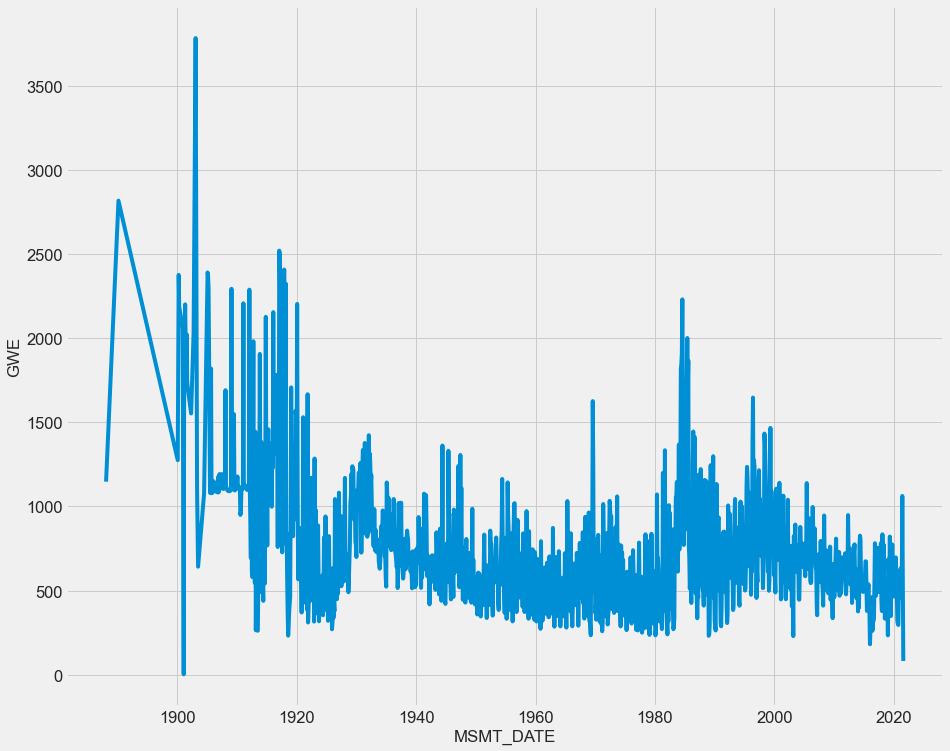

In [375]:
plt.figure(figsize=(14, 12))
sns.lineplot(x=groundwater.index, y=groundwater['GWE'])

In [376]:
# plt.figure(figsize=(14, 12))
# sns.lineplot(x=grouped_gw.index, y=grouped_gw['GWE'])

---
## Emergency Water Conservation
---

In [377]:
emergency

,Supplier Name,Public Water System ID,Reporting Month,County,Hydrologic Region,Climate Zone,Water Shortage Contingency Stage Invoked,Enhanced outreach and communication,Raising rates,Apply drought surcharges,...,Penalty Other,Number of Water Waste incidents identified or reported,Number of water waste complaints investigated,Number of water wasters notified,Watering on wrong day,Over-irrigating and causing runoff,Watering sidewalk,Water use over budget,Water Waste Other,Unnamed: 67
0,"Los Banos, City of",CA2410005,2021-04-15,Merced,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Los Banos, City of",CA2410005,2021-03-15,Merced,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Los Banos, City of",CA2410005,2021-02-15,Merced,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Los Banos, City of",CA2410005,2021-01-15,Merced,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Los Banos, City of",CA2410005,2020-12-15,Merced,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Mountain House Community Services District,CA3910027,2021-02-15,San Joaquin,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
662,Mountain House Community Services District,CA3910027,2021-01-15,San Joaquin,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
663,Mountain House Community Services District,CA3910027,2020-12-15,San Joaquin,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
664,Mountain House Community Services District,CA3910027,2020-11-15,San Joaquin,San Joaquin River,12,2,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
emergency['Supplier Name'].nunique()

116

In [379]:
emergency.columns

Index(['Supplier Name', 'Public Water System ID', 'Reporting Month', 'County',
       'Hydrologic Region', 'Climate Zone',
       'Water Shortage Contingency Stage Invoked',
       'Enhanced outreach and communication', 'Raising rates',
       'Apply drought surcharges',
       'Reduced allocations (for agencies with budget-based rates)',
       'Residential water audits', 'CII water audits',
       'Expanded existing rebate program', 'Rationing',
       'Turf replacement/rebate', 'Demand Reduction Other', 'Greywater',
       'On-site treatment and reuse', 'Desalination', 'Recycled Water',
       'Remediated Groundwater', 'Supply Augmentation Other',
       'Weekly watering restrictions',
       'Excessive irrigation of outdoor landscapes',
       'Washing a motor vehicle with a hose not fitted with a shut-off nozzle',
       'Application of potable water directly to driveways or sidewalks',
       'Use of potable water in decorative water features',
       'The application of water to

In [380]:
cols = [
    'Enhanced outreach and communication', 
    'Raising rates',
       'Apply drought surcharges',
       'Reduced allocations (for agencies with budget-based rates)',
       'Residential water audits', 'CII water audits',
       'Expanded existing rebate program', 'Rationing',
       'Turf replacement/rebate', 'Demand Reduction Other', 'Greywater',
       'On-site treatment and reuse', 'Desalination', 'Recycled Water',
       'Remediated Groundwater', 'Supply Augmentation Other',
       'Weekly watering restrictions',
       'Excessive irrigation of outdoor landscapes',
       'Washing a motor vehicle with a hose not fitted with a shut-off nozzle',
       'Application of potable water directly to driveways or sidewalks',
       'Use of potable water in decorative water features',
       'The application of water to irrigate turf and ornamental landscapes during and within 48 hours after measurable rainfall',
       'Restrictions Other',
       'Not serving drinking water other than upon request in eating or drinking establishments',
       'Operators of hotels and motels providing guests with the option of choosing not to have towels and linens laundered daily',
       'Industry Other', 'E-mails', 'Paper mail',
       'Notifications via Customer App', 'Website', 'Articles/News releases',
       'Youtube', 'Facebook', 'Instagram', 'Other Social Media',
       'Community events', 'Door hanger', 'Workshops', 'Television', 'Radio',
       'Billboard', 'Paid Media Advertising', 'Bus shelter',
       'Communication Other (Fill-in)', 'Notification via customer app',
       'Notification via Phone call', 'Notification via Letter',
       'Notification via Door hanger', 'Notification via Other', 'Fine',
       'Assigned a different rate tier', 
#     'Penalty Other',
#        'Number of Water Waste incidents identified or reported',
#        'Number of water waste complaints investigated',
#        'Number of water wasters notified', 
    'Watering on wrong day',
       'Over-irrigating and causing runoff', 'Watering sidewalk',
       'Water use over budget', 'Water Waste Other']

for i in cols:
    print(emergency[i].value_counts())
    print()

Y    159
Name: Enhanced outreach and communication, dtype: int64

Y    61
Name: Raising rates, dtype: int64

Y    32
Name: Apply drought surcharges, dtype: int64

Y    21
Name: Reduced allocations (for agencies with budget-based rates), dtype: int64

Y    124
Name: Residential water audits, dtype: int64

Y    68
Name: CII water audits, dtype: int64

Y    44
Name: Expanded existing rebate program, dtype: int64

Y    12
Name: Rationing, dtype: int64

Y    68
Name: Turf replacement/rebate, dtype: int64

Y    8
Name: Demand Reduction Other, dtype: int64

Series([], Name: Greywater, dtype: int64)

Y    3
Name: On-site treatment and reuse, dtype: int64

Y    16
Name: Desalination, dtype: int64

Y    36
Name: Recycled Water, dtype: int64

Y    16
Name: Remediated Groundwater, dtype: int64

Series([], Name: Supply Augmentation Other, dtype: int64)

Y    164
Name: Weekly watering restrictions, dtype: int64

Y    233
Name: Excessive irrigation of outdoor landscapes, dtype: int64

Y    215
Name: 

In [381]:
len(emergency)

666

In [382]:
emergency['Number of water waste complaints investigated'].isnull().sum()

473

In [383]:
emergency.dtypes[-10:]

Penalty Other                                              object
Number of Water Waste incidents identified or reported    float64
Number of water waste complaints investigated             float64
Number of water wasters notified                          float64
Watering on wrong day                                      object
Over-irrigating and causing runoff                         object
Watering sidewalk                                          object
Water use over budget                                      object
Water Waste Other                                          object
Unnamed: 67                                               float64
dtype: object

In [384]:
emergency.columns

Index(['Supplier Name', 'Public Water System ID', 'Reporting Month', 'County',
       'Hydrologic Region', 'Climate Zone',
       'Water Shortage Contingency Stage Invoked',
       'Enhanced outreach and communication', 'Raising rates',
       'Apply drought surcharges',
       'Reduced allocations (for agencies with budget-based rates)',
       'Residential water audits', 'CII water audits',
       'Expanded existing rebate program', 'Rationing',
       'Turf replacement/rebate', 'Demand Reduction Other', 'Greywater',
       'On-site treatment and reuse', 'Desalination', 'Recycled Water',
       'Remediated Groundwater', 'Supply Augmentation Other',
       'Weekly watering restrictions',
       'Excessive irrigation of outdoor landscapes',
       'Washing a motor vehicle with a hose not fitted with a shut-off nozzle',
       'Application of potable water directly to driveways or sidewalks',
       'Use of potable water in decorative water features',
       'The application of water to

In [385]:
# emergency['Penalty Other'].astype(int).sum()

In [386]:
emergency['Number of Water Waste incidents identified or reported'].sum()

2766.0

In [387]:
emergency['Number of water waste complaints investigated'].sum()

3014.0

In [388]:
emergency['Number of water wasters notified'].sum()

3108.0

In [389]:
emergency.groupby('Hydrologic Region')['Number of Water Waste incidents identified or reported'].sum()

Hydrologic Region
Central Coast          35.0
Colorado River         88.0
North Coast            30.0
North Lahontan          0.0
Sacramento River        4.0
San Francisco Bay     151.0
San Joaquin River     259.0
South Coast          2122.0
South Lahontan         19.0
Tulare Lake            58.0
Name: Number of Water Waste incidents identified or reported, dtype: float64

In [390]:
# emergency['Penalty Other'].astype(int).sum()

---
## Create Cleaned Data Tables
---

In [391]:
# keeping counties and hydrologic reasons for inference 
reverse_counties = {b: a for a, b in counties.items()}
reverse_hydro  = {b: a for a, b in hydro_regions.items()}
counties_df = pd.DataFrame.from_dict(reverse_counties, orient='index')
counties_df = counties_df.rename(columns={0: 'County'})
hydro_region_df =  pd.DataFrame.from_dict(reverse_hydro, orient='index')
hydro_region_df = hydro_region_df.rename(columns={0: 'hydrologic_region'})

In [392]:
counties_df

,County
0,"Alameda,Contra Costa"
1,San Luis Obispo
2,Orange
3,Los Angeles
4,Merced
...,...
57,Siskiyou
58,Mendocino
59,Lassen
60,Tehama


In [393]:
# keeping a list of supplier names for later use 
supplier_names = water[['supplier_name', 'system_id']]
supplier_names = supplier_names.drop_duplicates()
supplier_names = supplier_names.reset_index(drop=True)
supplier_names.head()

,supplier_name,system_id
0,East Bay Municipal Utilities District,110005
1,Morro Bay City of,4010011
2,Yorba Linda Water District,3010037
3,Long Beach City of,1910065
4,"Los Banos, City of",2410005


In [394]:
cleaned_water = water.select_dtypes(np.number)
cleaned_water = cleaned_water.merge(water['reporting_month'], how='inner', 
                                    left_index=True, right_index=True)
cleaned_water = cleaned_water.reset_index(drop=True)
cleaned_water = cleaned_water.rename(columns={"reporting_month": "reporting_date",})
cleaned_water.shape

(32425, 16)

In [395]:
cleaned_water.dtypes

climate_zone                                                                   int64
total_population_served                                                      float64
reference_2014_population                                                    float64
water_shortage_contingency_stage_invoked                                     float64
reported_final_total_potable_water_production                                float64
final_percent_residential_use                                                float64
reported_final_commercial_industrial_and_institutional_water                 float64
calculated_total_potable_water_production_gallons_ag_excluded                float64
calculated_total_potable_water_production_gallons_2013_ag_excluded           float64
calculated_commercial_agricultural_water_gallons                             float64
calculated_commercial_agricultural_water_gallons_2013                        float64
calculated_r_gpcd                                                

---
## Exports 
---

In [396]:
hydro_region_df.to_csv('./cleaned_datasets/hydrologic_regions.csv', index=False)
counties_df.to_csv('./cleaned_datasets/counties.csv', index=False)
supplier_names.to_csv('./cleaned_datasets/supplier_names.csv', index=False)
cleaned_water.to_csv('./cleaned_datasets/water_suppliers.csv', index=False)
conserv.to_csv('./cleaned_datasets/conservation.csv', index=False)